In [2]:
#Importação das Bibliotecas
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl 
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [3]:
#Download do Dataset
!pip3 install wget
!wget https://raw.githubusercontent.com/diogocortiz/Curso-IA-para-todos/master/RegressaoLinear/FuelConsumptionCo2.csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=a8eaae706d5a46ee2fca86b11c4720cdc55af29cd13b488ce4bd0a0b36e4dde3
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
--2022-10-27 00:53:08--  https://raw.githubusercontent.com/diogocortiz/Curso-IA-para-todos/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.007s  

2022-10-27 00:53:08 (10.3 MB/s) - ‘FuelConsumptionCo2.csv’ saved [7

In [4]:
#Carregar Dataset(Pandas)

dataframe = pd.read_csv('FuelConsumptionCo2.csv')

print(dataframe.head())


   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [5]:
#Exibe resumo do dataframe

print(dataframe.describe()) 

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

In [6]:
#Selecionar as featuares do motor e CO2
#Motores Variavel Independente
motores = dataframe[['ENGINESIZE']] 
#Co2 Variavel Dependente
co2 = dataframe[['CO2EMISSIONS']] 

print(motores.head())

print(co2.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
   CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244


In [7]:
#Dividir o dataframe em treino e teste

motores_treino,motores_teste,co2_treino,co2_teste = train_test_split(motores, co2, test_size = 0.2 ,random_state=42)
print(type(motores_treino))
print(type(motores_teste))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


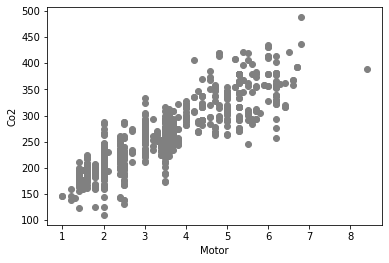

In [8]:
#Exibir a correlação Linear entre as features do dataset de treinamento
plt.scatter(motores_treino,co2_treino,color = 'gray')
plt.xlabel('Motor')
plt.ylabel('Co2')
plt.show()


In [9]:
#Treinamento de regressão Linear

modelo = linear_model.LinearRegression()

#Treinar usando o dataset de testes
#Encontrar A e B na função Y = AX + B
modelo.fit(motores_treino,co2_treino)




LinearRegression()

In [10]:
#Valores de A e B
print(f'A inclinação A é {modelo.coef_}')
print(f'O intercepto B é {modelo.intercept_}')



A inclinação A é [[38.99297872]]
O intercepto B é [126.28970217]


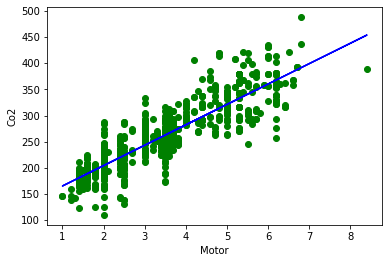

In [11]:
#Printar a tela de regressão
plt.scatter(motores_treino,co2_treino,color = 'green')
plt.plot(motores_treino,modelo.coef_[0][0]*motores_treino + modelo.intercept_[0] ,'-b')
plt.xlabel('Motor')
plt.ylabel('Co2')
plt.show()

In [12]:
#Executar no Dataset de teste

preverCo2 = modelo.predict(motores_teste)


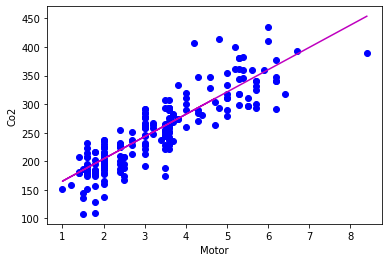

In [13]:
#Exibir reta de regressão no dataset de testes

plt.scatter(motores_teste,co2_teste,color = 'blue')
plt.plot(motores_teste,modelo.coef_[0][0]*motores_teste + modelo.intercept_[0] ,'-m')
plt.xlabel('Motor')
plt.ylabel('Co2')
plt.show()

In [16]:
#Calcular a emissão de Co2 de um motor
motor = float(input("Digite o motor que você quer analisar\n"))

co2Emitido = modelo.coef_*motor + modelo.intercept_

print("A emissão de Co2 do motor é %.2f" % co2Emitido)




Digite o motor que você quer analisar
25.0
A emissão de Co2 do motor é 1101.11


In [17]:
#Avaliar o modelo
print('Soma dos Erros ao Quadrado (SSE): %.2f' % np.sum((preverCo2 - co2_teste))**2)
print('Erro Quadratico Médio (MSE): %.2f' % mean_squared_error(co2_teste,preverCo2))
print('Erro Médio Absoluto (EMA): %.2f' % mean_absolute_error(co2_teste,preverCo2))
print('Raiz do Erro Quadratico Médio (RMSE): %.2f' % sqrt(mean_squared_error(co2_teste,preverCo2)))
print('R2 - Score: %.2f' % r2_score(preverCo2,co2_teste ) )

Soma dos Erros ao Quadrado (SSE): 335869.81
Erro Quadratico Médio (MSE): 985.94
Erro Médio Absoluto (EMA): 24.10
Raiz do Erro Quadratico Médio (RMSE): 31.40
R2 - Score: 0.68
